In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms

import warnings
warnings.filterwarnings('ignore') # Suppress skl k-NN param warnings 

from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

In [2]:
# Read the data
train = pd.read_csv('train.csv')

# No hold out data
X_unscaled = train.drop(columns=['Lead'])
y = train['Lead']

scaler = skl_pre.StandardScaler().fit(X_unscaled)
X = scaler.transform(X_unscaled)

In [12]:
def crossValidation(K, model_n, n_fold=10):
    cv = skl_ms.KFold(n_splits=n_fold, random_state=2, shuffle=True)
    misclassification = np.zeros(len(K))
    
    for train_index, val_index in cv.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
        model = None
        for j, k in enumerate(K):
            if (model_n == 1):
                model = skl_lm.LogisticRegression(penalty='l2',C=1/k)
            elif (model_n == 2):
                model = skl_nb.KNeighborsClassifier(n_neighbors=k)

            model.fit(X_train, y_train)
            prediction = model.predict(X_val)
            misclassification[j] += np.mean(prediction != y_val)
    misclassification /= n_fold

    return misclassification

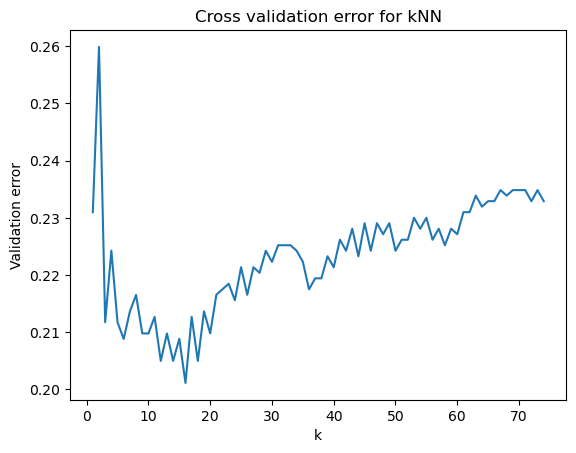

In [13]:
K=np.arange(1,75)
misclassification = crossValidation(K, 2)
plt.plot(K, misclassification)
plt.title('Cross validation error for kNN')
plt.xlabel('k')
plt.ylabel('Validation error')
plt.show()

In [ ]:
# Using Scikit learn kFold
n_fold = 10

cv = skl_ms.KFold(n_splits=n_fold, random_state=2, shuffle=True)
K = np.arange(1,75)
misclassification = np.zeros(len(K))

for train_index, val_index in cv.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    for j, k in enumerate(K):
        model = skl_nb.KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        prediction = model.predict(X_val)
        misclassification[j] += np.mean(prediction != y_val)

misclassification /= n_fold
plt.plot(K, misclassification)
plt.title('Cross validation error for kNN')
plt.xlabel('k')
plt.ylabel('Validation error')
plt.show()

## Trash pile 

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>



n_runs = 10
K = np.arange(1,50)

misclassification = np.zeros((n_runs, len(K)))
for i in range(n_runs):
    X_train, X_val, y_train, y_val = skl_ms.train_test_split(X, y, test_size = 0.3)
    
    for j, k in enumerate(K):
        model = skl_nb.KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        prediction = model.predict(X_val)
        misclassification[i,j] = np.mean(prediction != y_val)

average_mis = np.mean(misclassification, axis=0)

plt.plot(K, average_mis)
plt.show()

# Analyze model on test data
X_test = E_holdout.drop(columns=['Lead'])
y_test = E_holdout['Lead']

X_norm = scaler.transform(X)
X_test_norm = scaler.transform(X_test)

for k in range(1,50):
    model = skl_nb.KNeighborsClassifier(n_neighbors=k)
    model.fit(X_norm, y)
    prediction = model.predict(X_test_norm)
    print("--------------------")
    print("kNN with k =", k)
    print(pd.crosstab(prediction, y_test))
    print(f"Accuracy: {np.mean(prediction == y_test):.3f}")

# Cheating with grid search hyperparameter tuning
knn = skl_nb.KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,50)}

knn_gscv = skl_ms.GridSearchCV(knn, param_grid, cv=10)

knn_gscv.fit(scaler.transform(X), y)

print(knn_gscv.best_params_)

print(knn_gscv.best_score_)

### {'n_neighbors': 14}
### 0.7998319641523526

# Manual kFold
n_runs = 10
K = np.arange(1,75)

misclassification = np.zeros((n_runs, len(K)))
for i in range(n_runs):
    X_train, X_val, y_train, y_val = skl_ms.train_test_split(X, y, test_size=0.2)
    
    for j, k in enumerate(K):
        model = skl_nb.KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        prediction = model.predict(X_val)
        misclassification[i, j] = np.mean(prediction != y_val)

average_mis = np.mean(misclassification, axis=0)

plt.plot(K, average_mis)
plt.title('Cross validation error for kNN')
plt.xlabel('k')
plt.ylabel('Validation error')
plt.show()